In [1]:
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

In [2]:
!pip install keras-ocr -q

In [3]:
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

C:\Users\USER\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Looking for C:\Users\USER\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\USER\.keras-ocr\crnn_kurapan.h5


In [6]:
annot = pd.read_parquet('annot.parquet')
imgs = pd.read_parquet('img.parquet')
img_fns = glob('train_val_images/train_images/*')

In [7]:
# Enter the number of images to be predicted
num_img = 5

In [8]:
print(annot[:num_img])
print(imgs[:num_img])

                   id          image_id                           bbox  \
0  a4ea732cd3d5948a_1  a4ea732cd3d5948a   [525.83, 3.4, 197.64, 33.94]   
1  a4ea732cd3d5948a_2  a4ea732cd3d5948a  [534.67, 64.68, 91.22, 38.19]   
2  a4ea732cd3d5948a_3  a4ea732cd3d5948a  [626.95, 63.62, 96.52, 31.82]   
3  a4ea732cd3d5948a_4  a4ea732cd3d5948a  [577.4, 141.87, 147.13, 43.1]   
4  a4ea732cd3d5948a_5  a4ea732cd3d5948a  [391.03, 163.9, 60.82, 38.65]   

   utf8_string                                             points     area  
0  Performance  [525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525...  6707.90  
1        Sport  [535.73, 64.68, 623.41, 67.51, 625.89, 102.87,...  3483.69  
2        Watch  [626.95, 63.62, 721.7, 63.62, 723.47, 95.44, 6...  3071.27  
3   ...period.  [580.02, 143.61, 724.53, 141.87, 723.66, 184.9...  6341.30  
4            .  [395.2, 163.9, 451.85, 191.94, 445.59, 202.55,...  2350.69  
                 id  width  height    set                   file_name
0  a4ea732cd3d5948a    

In [9]:
img_names = []
for path in img_fns[:num_img]:
    filename = path.split('/')[-1]
    img_name = filename.split('.')[0]
    img_names.append(img_name)
print(img_names)

['train_images\\0000599864fd15b3', 'train_images\\0000e8b36676338b', 'train_images\\00010bf498b64bab', 'train_images\\00012db06b98f573', 'train_images\\00016982f6086d39']


In [10]:
img_fns_subset = img_fns[:num_img]

# Process images in smaller batches
batch_size = 2
num_batches = (num_img + batch_size - 1) // batch_size

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = min((batch_idx + 1) * batch_size, num_img)
    img_fns_batch = img_fns_subset[start_idx:end_idx]
    
    results = pipeline.recognize(img_fns_batch)
    print(f"Processed batch {batch_idx + 1}/{num_batches}")

1/1 [==============================] - 6s 6s/step
Processed batch 1/3
1/1 [==============================] - 1s 1s/step
Processed batch 2/3
1/1 [==============================] - 4s 4s/step
Processed batch 3/3


In [11]:
predicted_labels = []
for r in results:
    df = pd.DataFrame(r,columns=["text","bbox"])
    predicted_labels.extend(df['text'].to_list())
print(predicted_labels)

['v', 'applications', 'e', '1215', '39', 'd', 'lightsabre', 'traca', 'screensnap', 'sports', 'adobe', 'touch', 'guitar', 'touch', 'piano', 'pdf', 'g', 'tube', 'upcode', 'youtube', 'zip', 'tfl', 'tfl', 'for', 'map', 'winrar', 'mail', 'exc', 'options', 'back']


In [12]:
true_labels=[]
for i in img_names:
    true_labels.extend(annot[annot['image_id'] == i]['utf8_string'].to_list())
true_labels = [element.lower() for element in true_labels]
print(true_labels)

[]


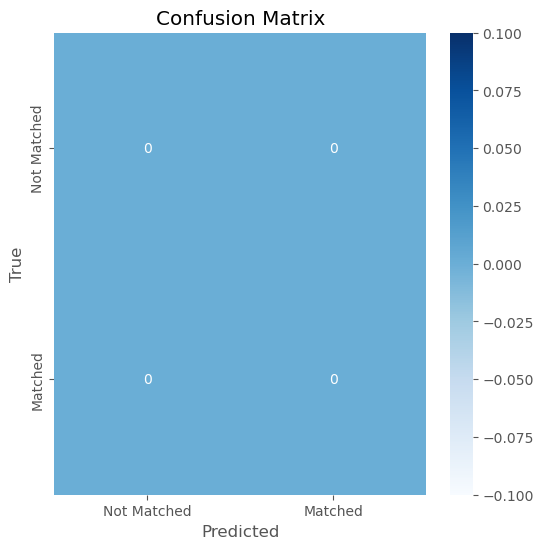

In [13]:
min_val = min(len(true_labels),len(predicted_labels))
confusion_mat = confusion_matrix(true_labels[:min_val], predicted_labels[:min_val])

binary_confusion_mat = np.zeros((2, 2))
binary_confusion_mat[0, 0] = np.sum(np.logical_and(confusion_mat > 0, confusion_mat.T > 0))
binary_confusion_mat[1, 0] = np.sum(np.logical_and(confusion_mat == 0, confusion_mat.T > 0))
binary_confusion_mat[0, 1] = np.sum(np.logical_and(confusion_mat > 0, confusion_mat.T == 0))
binary_confusion_mat[1, 1] = np.sum(np.logical_and(confusion_mat == 0, confusion_mat.T == 0))

plt.figure(figsize=(6, 6))
sns.heatmap(binary_confusion_mat, annot=True, fmt=".0f", cmap="Blues", xticklabels=['Not Matched', 'Matched'], yticklabels=['Not Matched', 'Matched'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [14]:
img_uploaded = glob('my-own/*')
print(img_uploaded)

['my-own\\c.jpeg']


2/2 [==============================] - 5s 2s/step
['pakistan', 'national', 'eo', 'identity', 'card', 'slanic', 'repuelic', 'of', 'pasistan', 'name', 'wardah', 'manzoor', 'e', 'iid', 'fatler', 'name', 'manzor', 'ali', 'shah', 'bukhar', 'sae', 'ltuos', 'gender', 'country', 'of', 'stay', 'f', 'pakistan', 'identity', 'numpber', 'date', 'of', 'birth', '42301', '39740466', '29042003', 'lzouz', 'date', 'of', 'ssue', 'date', 'of', 'expilcy', '10062021', '10062051', 'edusid', 'holder', 'signature', 's']


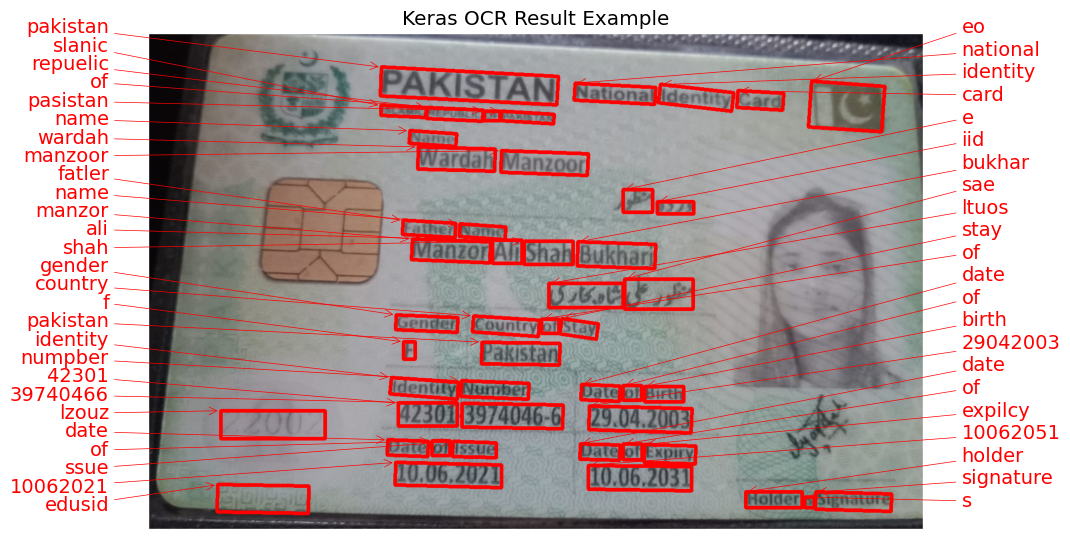

In [15]:
for i in img_uploaded:
    results = pipeline.recognize([i])
    result_df = pd.DataFrame(results[0], columns=['text', 'bbox'])
    print(result_df['text'].to_list())
#     print(result_df['text'])
    fig, ax = plt.subplots(figsize=(10, 10))
    keras_ocr.tools.drawAnnotations(plt.imread(i), results[0], ax=ax)
    ax.set_title('Keras OCR Result Example')
    plt.show()